In [1]:
#Implementation of k-means clustering algorithm.
#These functions are designed to work with cartesian data points
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def convert_to_2d_array(points):
    #Converts `points` to a 2-D numpy array.
    points = np.array(points)
    if len(points.shape) == 1:
        points = np.expand_dims(points, -1)
    return points

In [3]:
def visualize_clusters(clusters):
    """
    Visualizes the first 2 dimensions of the data as a 2-D scatter plot.
    """
    plt.figure()
    for cluster in clusters:
        points = convert_to_2d_array(cluster)
        if points.shape[1] < 2:
            points = np.hstack([points, np.zeros_like(points)])
        plt.plot(points[:,0], points[:,1], 'o')
    plt.show()

In [4]:
def SSE(points):
    """
    Calculates the sum of squared errors for the given list of data points.
    """
    points = convert_to_2d_array(points)
    centroid = np.mean(points, 0)
    errors = np.linalg.norm(points-centroid, ord=2, axis=1)
    return np.sum(errors)

In [5]:
def kmeans(points, k=2, epochs=10, max_iter=100, verbose=False):
    """
    Clusters the list of points into `k` clusters using k-means clustering
    algorithm.
    """
    points = convert_to_2d_array(points)
    assert len(points) >= k, "Number of data points can't be less than k"
    best_sse = np.inf
    for ep in range(epochs):
        # Randomly initialize k centroids
        np.random.shuffle(points)
        centroids = points[0:k, :]
        last_sse = np.inf
        for it in range(max_iter):
            # Cluster assignment
            clusters = [None] * k
            for p in points:
                index = np.argmin(np.linalg.norm(centroids-p, 2, 1))
                if clusters[index] is None:
                    clusters[index] = np.expand_dims(p, 0)
                else:
                    clusters[index] = np.vstack((clusters[index], p))
            # Centroid update
            centroids = [np.mean(c, 0) for c in clusters]
            # SSE calculation
            sse = np.sum([SSE(c) for c in clusters])
            gain = last_sse - sse
            if verbose:
                print((f'Epoch: {ep:3d}, Iter: {it:4d}, '
                       f'SSE: {sse:12.4f}, Gain: {gain:12.4f}'))
            # Check for improvement
            if sse < best_sse:
                best_clusters, best_sse = clusters, sse
                #print('best so far')
            # Epoch termination condition
            if np.isclose(gain, 0, atol=0.00001):
                break
            last_sse = sse
    return best_clusters

In [6]:
def bisecting_kmeans(points, k=2, epochs=10, max_iter=100, verbose=False):
    """
    Clusters the list of points into `k` clusters using bisecting k-means
    clustering algorithm. Internally, it uses the standard k-means with k=2 in
    each iteration.
    """
    points = convert_to_2d_array(points)
    clusters = [points]
    while len(clusters) < k:
        max_sse_i = np.argmax([SSE(c) for c in clusters])
        cluster = clusters.pop(max_sse_i)
        two_clusters = kmeans(
            cluster, k=2, epochs=epochs, max_iter=max_iter, verbose=verbose)
        clusters.extend(two_clusters)
    return clusters

In [7]:
# Import the data
df = pd.read_csv('Mall_Customers.csv')
df = df[['Annual Income (k$)','Spending Score (1-100)']]
df.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


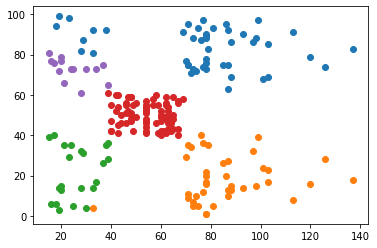

In [8]:
points = np.array(df.values.tolist())
# algorithm = kmeans
algorithm = bisecting_kmeans
k = 5
verbose = False
max_iter = 1000
epochs = 10
clusters = algorithm(
    points=points, k=k, verbose=verbose, max_iter=max_iter, epochs=epochs)
visualize_clusters(clusters)


In [9]:
data = {'x1':  [1,2,1,2,8,9,9,8,1,2,1,2],
        'x2': [2,1,1,2,9,8,9,8,15,15,14,14],
        }

In [10]:
df = pd.DataFrame (data, columns = ['x1','x2'])
df.head(5)

,x1,x2
0,1,2
1,2,1
2,1,1
3,2,2
4,8,9


In [11]:
points = np.array(df.values.tolist())
algorithm = kmeans
#algorithm = bisecting_kmeans
k = 3
verbose = True
max_iter = 1000
epochs = 10
clusters = algorithm(points=points, k=k, verbose=verbose, max_iter=max_iter, epochs=epochs)

Epoch:   0, Iter:    0, SSE:      39.0939, Gain:          inf
Epoch:   0, Iter:    1, SSE:      39.0939, Gain:       0.0000
Epoch:   1, Iter:    0, SSE:       8.4853, Gain:          inf
Epoch:   1, Iter:    1, SSE:       8.4853, Gain:       0.0000
Epoch:   2, Iter:    0, SSE:      61.3579, Gain:          inf
Epoch:   2, Iter:    1, SSE:      27.7504, Gain:      33.6075
Epoch:   2, Iter:    2, SSE:       8.4853, Gain:      19.2651
Epoch:   2, Iter:    3, SSE:       8.4853, Gain:       0.0000
Epoch:   3, Iter:    0, SSE:      29.8767, Gain:          inf
Epoch:   3, Iter:    1, SSE:       8.4853, Gain:      21.3914
Epoch:   3, Iter:    2, SSE:       8.4853, Gain:       0.0000
Epoch:   4, Iter:    0, SSE:       8.4853, Gain:          inf
Epoch:   4, Iter:    1, SSE:       8.4853, Gain:       0.0000
Epoch:   5, Iter:    0, SSE:      41.7990, Gain:          inf
Epoch:   5, Iter:    1, SSE:      41.7990, Gain:       0.0000
Epoch:   6, Iter:    0, SSE:       8.4853, Gain:          inf
Epoch:  

In [12]:
clusters

[array([[9, 8],
        [9, 9],
        [8, 9],
        [8, 8]]),
 array([[ 1, 14],
        [ 2, 14],
        [ 2, 15],
        [ 1, 15]]),
 array([[1, 2],
        [1, 1],
        [2, 1],
        [2, 2]])]

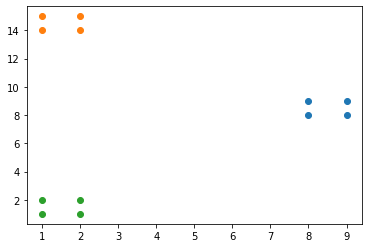

In [13]:
visualize_clusters(clusters)

## K-medoid

In [14]:
#ref. https://towardsdatascience.com/k-medoids-clustering-on-iris-data-set-1931bf781e05
#ref. https://www.youtube.com/watch?v=AUriFHKw0TU
#https://medium.com/analytics-vidhya/supernaive-k-medoids-clustering-31db7bfc5075
#https://github.com/briverse17/supernaive-kmedoids/blob/master/SuperNaive_kmedoids.ipynb

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def euclideanDistance(x, y):
    '''
    Euclidean distance between x, y
    --------
    Return
    d: float
    '''
    squared_d = 0
    for i in range(len(x)):
        squared_d += (x[i] - y[i])**2
    d = np.sqrt(squared_d)
    return d

In [17]:
class k_medoids:
    def __init__(self, k = 2, max_iter = 300, has_converged = False):
        ''' 
        Class constructor
        Parameters
        ----------
        - k: number of clusters. 
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''
        self.k = k
        self.max_iter = max_iter
        self.has_converged = has_converged
        self.medoids_cost = []
        
    def initMedoids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.medoids = []
        
        #Starting medoids will be random members from data set X
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.medoids = X[indexes]
        
        for i in range(0,self.k):
            self.medoids_cost.append(0)
        
    def isConverged(self, new_medoids):
        '''
        Parameters
        ----------
        new_medoids: the recently calculated medoids to be compared with the current medoids stored in the class
        '''
        return set([tuple(x) for x in self.medoids]) == set([tuple(x) for x in new_medoids])
        
    def updateMedoids(self, X, labels):
        '''
        Parameters
        ----------
        labels: a list contains labels of data points
        '''
        self.has_converged = True
        
        #Store data points to the current cluster they belong to
        clusters = []
        for i in range(0,self.k):
            cluster = []
            for j in range(len(X)):
                if (labels[j] == i):
                    cluster.append(X[j])
            clusters.append(cluster)
        
        #Calculate the new medoids
        new_medoids = []
        for i in range(0, self.k):
            new_medoid = self.medoids[i]
            old_medoids_cost = self.medoids_cost[i]
            for j in range(len(clusters[i])):
                
                #Cost of the current data points to be compared with the current optimal cost
                cur_medoids_cost = 0
                for dpoint_index in range(len(clusters[i])):
                    cur_medoids_cost += euclideanDistance(clusters[i][j], clusters[i][dpoint_index])
                
                #If current cost is less than current optimal cost,
                #make the current data point new medoid of the cluster
                if cur_medoids_cost < old_medoids_cost:
                    new_medoid = clusters[i][j]
                    old_medoids_cost = cur_medoids_cost
            
            #Now we have the optimal medoid of the current cluster
            new_medoids.append(new_medoid)
        
        #If not converged yet, accept the new medoids
        if not self.isConverged(new_medoids):
            self.medoids = new_medoids
            self.has_converged = False
    
    def fit(self, X):
        '''
        FIT function, used to find clusters
        Parameters
        ----------
        X: input data. 
        '''
        self.initMedoids(X)
        
        for i in range(self.max_iter):
            #Labels for this iteration
            cur_labels = []
            for medoid in range(0,self.k):
                #Dissimilarity cost of the current cluster
                self.medoids_cost[medoid] = 0
                for k in range(len(X)):
                    #Distances from a data point to each of the medoids
                    d_list = []                    
                    for j in range(0,self.k):
                        d_list.append(euclideanDistance(self.medoids[j], X[k]))
                    #Data points' label is the medoid which has minimal distance to it
                    cur_labels.append(d_list.index(min(d_list)))
                    
                    self.medoids_cost[medoid] += min(d_list)
                                
            self.updateMedoids(X, cur_labels)
            
            if self.has_converged:
                break

        return np.array(self.medoids)

        
    def predict(self,data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            #Distances from a data point to each of the medoids
            d_list = []
            for j in range(len(self.medoids)):
                d_list.append(euclideanDistance(self.medoids[j],data[i]))
                
            pred.append(d_list.index(min(d_list)))
            
        return np.array(pred)

In [18]:
np.random.seed(8)

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

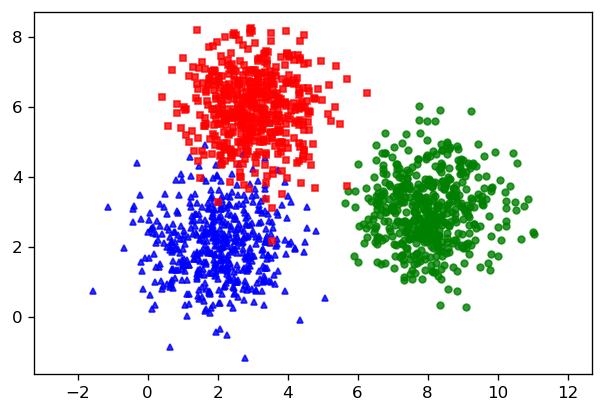

In [19]:
def visualize(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
visualize(X, original_label)

Centers found by your model:
[[1.98413249 2.04159709]
 [7.93224207 3.0213355 ]
 [2.98493437 5.97312308]]


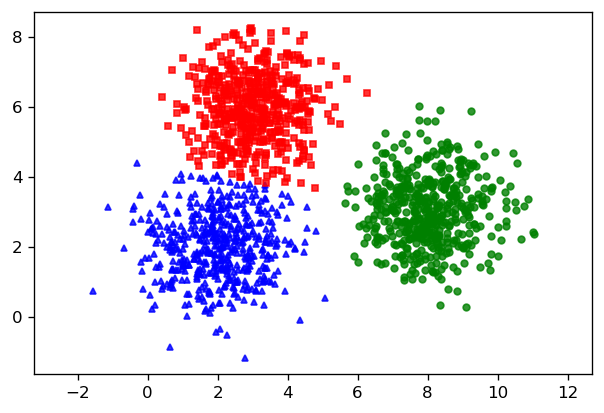

In [20]:
model=k_medoids(k=3)
print('Centers found by your model:')
print(model.fit(X))

pred = model.predict(X)

visualize(X,pred)

## K-medoid

In [21]:
# ref. https://towardsdatascience.com/k-medoids-clustering-on-iris-data-set-1931bf781e05
# ref. https://gist.githubusercontent.com/nqtri/e29e0c7936859a6ff3ba31a1fc71b338/raw/c25865eab2bf94acdd8ca349dd530d25262f8213/iris_kmedoid.py

In [22]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [23]:
# Dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns = iris.feature_names)

target = iris.target_names
labels = iris.target

#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [24]:
data = {'x1':  [1,2,1,2,8,9,9,8,1,2,1,2],
        'x2': [2,1,1,2,9,8,9,8,15,15,14,14],
        }
data = np.array([
    [1.0,2.0],
    [2.0,1.0],
    [1.0,1.0],
    [2.0,2.0],
    [8.0,9.0],
    [9.0,8.0],
    [9.0,9.0],
    [8.0,8.0],
    [1.0,15.0],
    [2.0,15.0],
    [1.0,14.0],
    [2.0,14.0]
])
#data = pd.DataFrame (data, columns = ['x1','x2'])
#data.head(5)

In [265]:
datapoints = data
# OOOUUUUU

In [227]:
#PCA Transformation - compute three most important components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)
PCAdf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])

datapoints = PCAdf.values

In [266]:
m, f = datapoints.shape
k = 3
datapoints

array([[ 1.,  2.],
       [ 2.,  1.],
       [ 1.,  1.],
       [ 2.,  2.],
       [ 8.,  9.],
       [ 9.,  8.],
       [ 9.,  9.],
       [ 8.,  8.],
       [ 1., 15.],
       [ 2., 15.],
       [ 1., 14.],
       [ 2., 14.]])

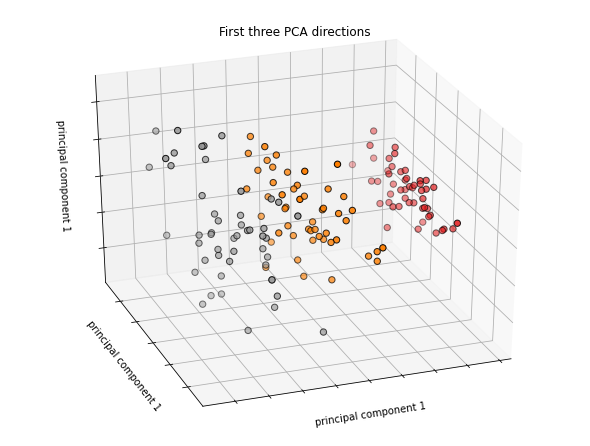

In [190]:
#Visualization iris sample
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = datapoints
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("principal component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("principal component 1")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("principal component 1")
ax.w_zaxis.set_ticklabels([])
plt.show()

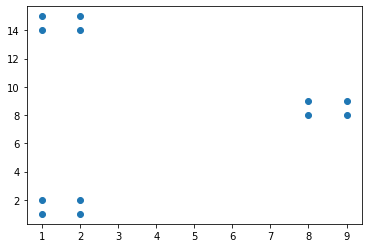

In [267]:
#Exercício Visualization
plt.scatter(datapoints[:,0],datapoints[:,1])

In [268]:
def init_medoids(X, k):
    from numpy.random import choice
    from numpy.random import seed
 
    seed(1)
    samples = choice(len(X), size=k, replace=False)
    return X[samples, :]

In [269]:
def compute_d_p(X, medoids, p):
    m = len(X)
    medoids_shape = medoids.shape
    # If a 1-D array is provided, 
    # it will be reshaped to a single row 2-D array
    if len(medoids_shape) == 1: 
        medoids = medoids.reshape((1,len(medoids)))
    k = len(medoids)
    
    S = np.empty((m, k))
    
    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, ord=p, axis=1)
        S[i, :] = d_i**p

    return S

In [270]:
def assign_labels(S):
    return np.argmin(S, axis=1)

In [271]:
def update_medoids(X, medoids, p):
    
    S = compute_d_p(datapoints, medoids, p)
    labels = assign_labels(S)
        
    out_medoids = medoids
                
    for i in set(labels):
        
        avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i], p))

        cluster_points = datapoints[labels == i]
        
        for datap in cluster_points:
            new_medoid = datap
            new_dissimilarity= np.sum(compute_d_p(datapoints, datap, p))
            
            if new_dissimilarity < avg_dissimilarity :
                avg_dissimilarity = new_dissimilarity
                
                out_medoids[i] = datap
                
    return out_medoids

In [272]:
def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

In [273]:
#Full algorithm
def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids
        
    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()
        
        S = compute_d_p(X, medoids, p)
        
        labels = assign_labels(S)
        
        medoids = update_medoids(X, medoids, p)
        
        converged = has_converged(old_medoids, medoids)
        i += 1
    return (medoids,labels)

In [197]:
medoids_initial = init_medoids(datapoints, 3)

In [274]:
#ouuuu   exercício
medoids_initial = np.array([
    [8.0,9.0],
    [9.0,8.0],
    [8.0,8.0]
])

In [275]:
medoids_initial

array([[8., 9.],
       [9., 8.],
       [8., 8.]])

In [282]:
S = compute_d_p(datapoints, medoids_initial, 2)
S

array([[145., 100.,  85.],
       [169.,  98.,  85.],
       [170., 113.,  98.],
       [144.,  85.,  72.],
       [ 61.,   2.,   1.],
       [ 85.,   0.,   1.],
       [ 74.,   1.,   2.],
       [ 72.,   1.,   0.],
       [  2., 113.,  98.],
       [  1.,  98.,  85.],
       [  1., 100.,  85.],
       [  0.,  85.,  72.]])

In [283]:
labels = assign_labels(S)
labels

array([2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0], dtype=int64)

In [278]:
#Efetivamente chama o método
results = kmedoids(datapoints, 3, 2)

In [284]:
# Ouuuuuuuuuu
#exercicio
medoids_initial = np.array([
   [8.0,9.0],
   [9.0,8.0],
   [8.0,8.0]
])
results = kmedoids(datapoints, 3, 2,starting_medoids=medoids_initial)

In [285]:
final_medoids = results[0]
final_medoids

array([[8., 9.],
       [9., 8.],
       [8., 8.]])

In [286]:
#data['clusters'] = results[1] #######ou 
results[1]

array([2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0], dtype=int64)

In [208]:
#Count
def mark_matches(a, b, exact=False):
    """
    Given two Numpy arrays of {0, 1} labels, returns a new boolean
    array indicating at which locations the input arrays have the
    same label (i.e., the corresponding entry is True).
    
    This function can consider "inexact" matches. That is, if `exact`
    is False, then the function will assume the {0, 1} labels may be
    regarded as the same up to a swapping of the labels. This feature
    allows
    
      a == [0, 0, 1, 1, 0, 1, 1]
      b == [1, 1, 0, 0, 1, 0, 0]
      
    to be regarded as equal. (That is, use `exact=False` when you
    only care about "relative" labeling.)
    """
    assert a.shape == b.shape
    a_int = a.astype(dtype=int)
    b_int = b.astype(dtype=int)
    all_axes = tuple(range(len(a.shape)))
    assert ((a_int == 0) | (a_int == 1) | (a_int == 2)).all()
    assert ((b_int == 0) | (b_int == 1) | (b_int == 2)).all()
    
    exact_matches = (a_int == b_int)
    if exact:
        return exact_matches

    assert exact == False
    num_exact_matches = np.sum(exact_matches)
    if (2*num_exact_matches) >= np.prod (a.shape):
        return exact_matches
    return exact_matches == False # Invert

In [209]:
def count_matches(a, b, exact=False):
    """
    Given two sets of {0, 1} labels, returns the number of mismatches.
    
    This function can consider "inexact" matches. That is, if `exact`
    is False, then the function will assume the {0, 1} labels may be
    regarded as similar up to a swapping of the labels. This feature
    allows
    
      a == [0, 0, 1, 1, 0, 1, 1]
      b == [1, 1, 0, 0, 1, 0, 0]
      
    to be regarded as equal. (That is, use `exact=False` when you
    only care about "relative" labeling.)
    """
    matches = mark_matches(a, b, exact=exact)
    return np.sum(matches)

In [210]:
n_matches = count_matches(labels, data['clusters'])
print(n_matches,
      "matches out of",
      len(data), "data points",
      "(~ {:.1f}%)".format(100.0 * n_matches / len(labels)))

142 matches out of 150 data points (~ 94.7%)


## Exercício Calculo de indices
#Dunn, DB, PBM e Silhuetas
#Slide 33 - Agrupamento de Dados e suas Aplicações VII

In [14]:
def distEuclid(x, y, squared=True):
    if squared:
        distance= np.sum(np.square(x-y))
    else:
        distance= np.sqrt(np.sum(np.square(x-y)))
    return distance

In [15]:
# Compute Centroids
centroids = [np.mean(c, 0) for c in clusters]
centroids

[array([ 1.5, 14.5]), array([1.5, 1.5]), array([8.5, 8.5])]

In [16]:
for k in clusters:
    for x in k:
        print(x)

#clusters = [3]
#max_sse_i = np.argmax([SSE(c) for c in clusters])
#cluster = clusters.pop(max_sse_i)

#np.minimum(2, 5)
#np.maximum(2, 5)

[ 1 14]
[ 2 14]
[ 1 15]
[ 2 15]
[2 1]
[1 2]
[1 1]
[2 2]
[8 9]
[9 9]
[9 8]
[8 8]


## Exercício Agrupamento de Dados V - slide 58
## Executar k-means com k=2 até k=5 nos dados acima e representar graficamente a f. objetivo J em função de k

In [303]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

%matplotlib inline

In [304]:
#K-means customizado
class K_Means():
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self, x):
        col_min, col_max = x.min(axis=0), x.max(axis=0)
        self.centroids = np.array([np.random.rand(x.shape[1])*col_max + col_min for i in range(self.n_clusters)])
            
        for i in range(self.max_iter):
            clusters_idxs = self.predict(x)
            for c in range(self.n_clusters):
                if c in clusters_idxs:
                    self.centroids[c] = np.mean(x[c == clusters_idxs], axis=0)
                    
    def predict(self, x):
        distances = cdist(x, self.centroids)
        return np.argmin(distances, axis=1)  

In [305]:
def plotKMeans(x, y, centroids, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(x[:,0], x[:,1],c=y)
    plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')
    plt.title(title)

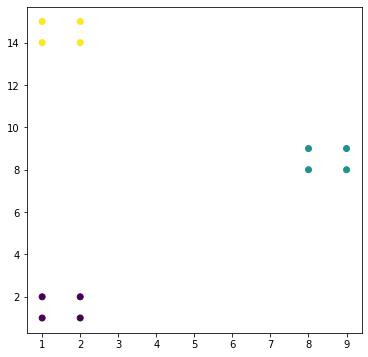

In [306]:
#Lição do material de aula
x = np.array([
    [1.0,2.0],    [2.0,1.0],    [1.0,1.0],    [2.0,2.0],    [8.0,9.0],    [9.0,8.0],    [9.0,9.0],
    [8.0,8.0],    [1.0,15.0],   [2.0,15.0],   [1.0,14.0],   [2.0,14.0]
])

y = np.array([[0],[0],[0],[0],[1],[1],[1],[1],[2],[2],[2],[2]])
    
plt.figure(figsize=(6, 6))
plt.scatter(x[:, 0], x[:, 1], c=y)

[[ 2.72367505 10.33163157]
 [ 8.5         8.5       ]
 [ 1.5         1.5       ]
 [ 1.5        14.5       ]]


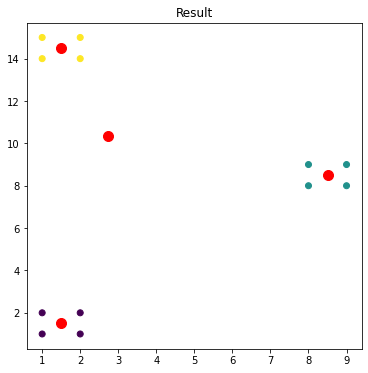

In [307]:
np.random.seed(1234)
kmeans = K_Means(n_clusters=4, max_iter=300)
kmeans.fit(x)

print(kmeans.centroids)

plotKMeans(x, y, kmeans.centroids, 'Result')

## implementação com Scikit Learn

[[ 1.5 14.5]
 [ 1.5  1.5]
 [ 8.5  8.5]]


<Figure size 504x432 with 0 Axes>

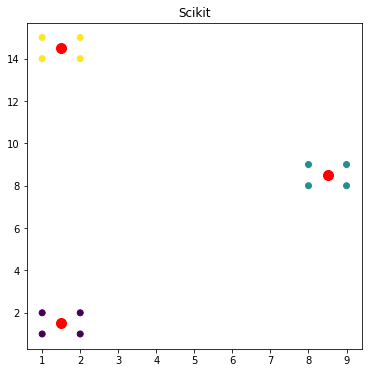

In [308]:
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=1234)
kmeans.fit(x)
pred = kmeans.predict(x)

print(kmeans.cluster_centers_)

plt.figure(figsize=(7, 6))
plotKMeans(x, y, kmeans.cluster_centers_, 'Scikit')

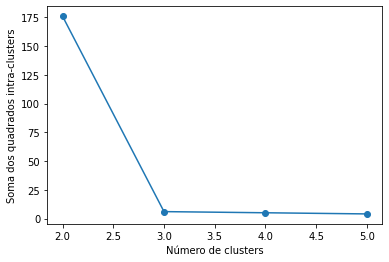

In [23]:
#Ref. https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9
#Calculo do SSE para k=2 a 5
distortions = []
for i in range(2, 6):
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)

# plot
plt.plot(range(2, 6), distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.show()

In [311]:
print('SSE para k entre 2 e 5')
distortions

SSE para k entre 2 e 5


[176.0, 6.0, 5.0, 4.0]

## Outro exemplo de k-means

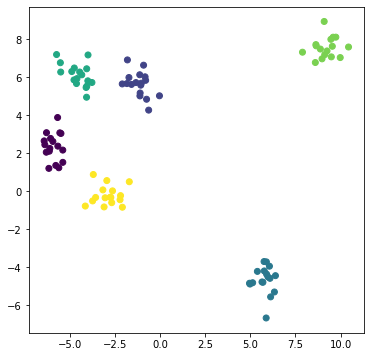

In [24]:
x, y = make_blobs(n_samples=100, centers=6, random_state=1234, cluster_std=0.6)

plt.figure(figsize=(6, 6))
plt.scatter(x[:, 0], x[:, 1], c=y)

[[-4.43689576  1.09428759]
 [ 9.20551979  7.56124841]
 [ 5.76444812 -4.67941789]
 [-2.8455246   5.87376915]]


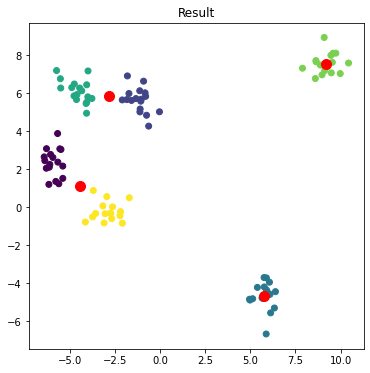

In [25]:
np.random.seed(1234)
kmeans = K_Means(n_clusters=4, max_iter=300)
kmeans.fit(x)

print(kmeans.centroids)

plotKMeans(x, y, kmeans.centroids, 'Result')